In [29]:
from keras.layers import Layer
from keras import backend as K

In [30]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras.layers import Layer, Dense, Input, LeakyReLU, Reshape
from tensorflow.keras.layers import UpSampling2D, AveragePooling2D, Flatten, Lambda,Layer
from tensorflow.keras.activations import relu, tanh
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.constraints import max_norm
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from glob import glob
from functools import partial
import time
import gdown
import warnings
warnings.filterwarnings('ignore')
print("Tensorflow", tf.__version__)

Tensorflow 2.10.0


In [31]:
from PIL import Image
from math import floor
import numpy as np
import time
from functools import partial
from random import random

import os

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import warnings
warnings.filterwarnings('ignore')

from glob import glob
from functools import partial
import time
import gdown

In [32]:
resolution= 64
BUFFER_SIZE= 200

In [33]:
path="C:\\Users\\sayan\\Desktop\\Anime\\images"

image_paths = []
for image_name in os.listdir(path):
    image_path = os.path.join(path, image_name)
    image_paths.append(image_path)

image_paths=image_paths[:BUFFER_SIZE*40]

def load_images(resolution,img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [resolution,resolution],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)    
    img = tf.cast(img, tf.float32)
    img = (img /127.5) -1
    return img

In [34]:
train_images = glob(path+'/**/*.jpg',recursive=True)
train_dataset_list = tf.data.Dataset.from_tensor_slices(train_images)
train_datasets={}

To apply growth, we first divide the dataset into batches, each containing a different resolution in ascending order

In [35]:
BATCH_SIZE = {2: 16, 3: 16, 4: 16, 5: 16, 6: 16, 7: 8, 8: 4, 9: 4, 10:4}
TRAIN_STEP_RATIO = {i: BATCH_SIZE[2]/j for i,j in BATCH_SIZE.items()}
for log2_res in range(2, int(np.log2(resolution))+1):
    res = 2**log2_res
    temp = train_dataset_list.map(partial(load_images,res),  num_parallel_calls= tf.data.experimental.AUTOTUNE)
    temp = temp.shuffle(BUFFER_SIZE).batch(BATCH_SIZE[log2_res],drop_remainder=True).repeat()
    train_datasets[log2_res] = temp

In [36]:
train_datasets

{2: <RepeatDataset element_spec=TensorSpec(shape=(16, 4, 4, None), dtype=tf.float32, name=None)>,
 3: <RepeatDataset element_spec=TensorSpec(shape=(16, 8, 8, None), dtype=tf.float32, name=None)>,
 4: <RepeatDataset element_spec=TensorSpec(shape=(16, 16, 16, None), dtype=tf.float32, name=None)>,
 5: <RepeatDataset element_spec=TensorSpec(shape=(16, 32, 32, None), dtype=tf.float32, name=None)>,
 6: <RepeatDataset element_spec=TensorSpec(shape=(16, 64, 64, None), dtype=tf.float32, name=None)>}

In [37]:
def plot_images(images, log2_res, fname=''):    
    scales = {2:0.5,
             3:1,
             4:2,
             5:3,
             6:4,
             7:5,
             8:6,
             9:7,
             10:8}
    scale = scales[log2_res]
    
    grid_col = min(images.shape[0], int(16//scale))
    grid_row = 1
    grid_row = images.shape[0]//grid_col
    grid_row = min(2, grid_row)

    f, axarr = plt.subplots(grid_row, grid_col, figsize=(grid_col*scale, grid_row*scale))

    for row in range(grid_row):
        ax = axarr if grid_row==1 else axarr[row]
        for col in range(grid_col):
            ax[col].imshow(images[row*grid_col + col])
            ax[col].axis('off')
    plt.show()
    if fname:
        print("image name", fname)
        f.savefig(fname)
        


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tf.Tensor([64 64  3], shape=(3,), dtype=int32)


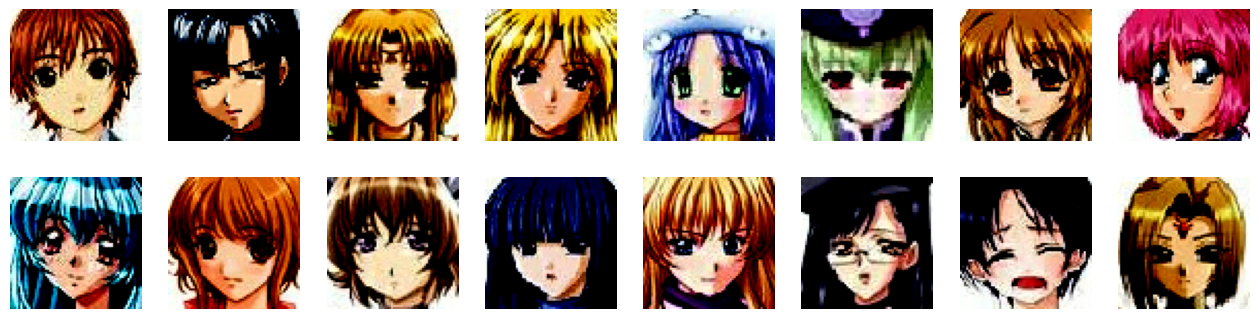

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tf.Tensor([64 64  3], shape=(3,), dtype=int32)


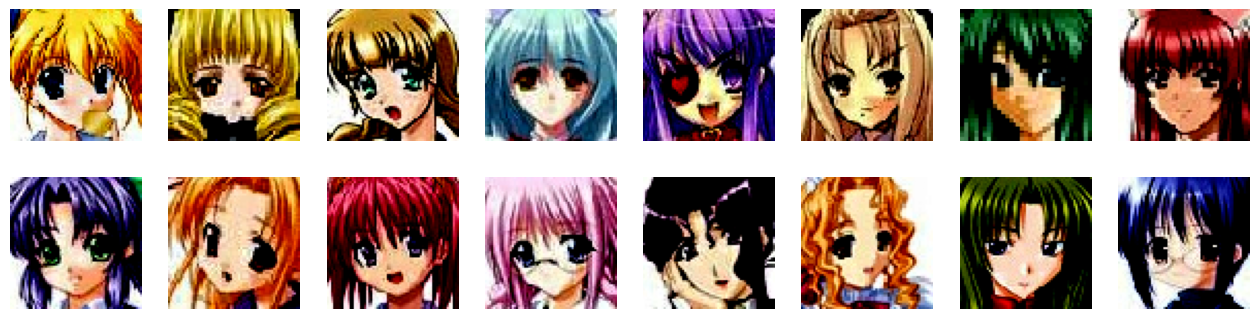

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tf.Tensor([64 64  3], shape=(3,), dtype=int32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyboardInterrupt: 

In [9]:

while(True):
 
 
   for j in train_datasets[6]:
     print(tf.shape(j[0]))
     plot_images(j,4)


In [38]:
class PixNorm(layers.Layer):
    def __init__(self):
        super(PixNorm, self).__init__()
    
    def call(self,inputs):
        mean_square = tf.reduce_mean(tf.square(inputs), axis=-1, keepdims=True)
        l2 = tf.math.rsqrt(mean_square + 1.0e-8)
        normalized = inputs * l2
        return normalized
    


In [39]:
class MiniStd(layers.Layer):
    def __init__(self, **kwargs):
        super(MiniStd, self).__init__(**kwargs)
    
    def call(self, inputs):
        mean = tf.reduce_mean(inputs, axis=0, keepdims=True)
        std = tf.sqrt(tf.reduce_mean(tf.square(inputs - mean), axis=0, keepdims=True) + 1e-8)
        average_std = tf.reduce_mean(std, keepdims=True)
        shape = tf.shape(inputs)
        mini_std = tf.tile(average_std, (shape[0], shape[1], shape[2], 1))
        total = tf.concat([inputs, mini_std], axis=-1)
        
        return total

In [40]:
class FadeIn(layers.Layer):
    @tf.function
    def call(self, input_alpha, a, b):
        alpha = tf.reduce_mean(input_alpha)
        y = alpha * a + (1. - alpha) * b
        return y

In [41]:
def wasserstein_loss(y_true, y_pred):
 return -tf.reduce_mean(y_true * y_pred)

In [42]:
class AddNoise(layers.Layer):

    def build(self,input_shape):
        N,H,W,C= input_shape[0]

        init=tf.keras.initializers.RandomNormal(mean=0.0,stddev=1.0)
        self.B= self.add_weight(shape=[1, 1, 1, C], initializer=init, trainable=True, name='kernel')

    def call(self,inputs):
        x,noise =inputs
        output= x+self.B *noise
        return output

In [43]:
class AdaInNorm(layers.Layer):
    def __init__(self,trainable=True,name=None,dtype=None,gain=1,**kwargs):
        super(AdaInNorm, self).__init__(**kwargs)
        self.trainable=True
        self.gain = gain
        
    def build(self, input_shapes):
        x_shape = input_shapes[0]
        w_shape = input_shapes[1]

        self.w_channels = w_shape[-1]
        self.x_channels = x_shape[-1]
        
        self.dense_1 = EqualizedDense(self.x_channels, gain=1)
        self.dense_2 = EqualizedDense(self.x_channels, gain=1)
        
        
    def call(self, inputs):
        x, w = inputs
        ys = tf.reshape(self.dense_1(w), (-1, 1, 1, self.x_channels))
        yb = tf.reshape(self.dense_2(w), (-1, 1, 1, self.x_channels))
        
        output = ys*x + yb
        return output    

In [44]:
class EqualizedConv2D(layers.Layer):
    def __init__(self, out_channels, kernel=3, gain=2, **kwargs):
        super().__init__(**kwargs)
        self.kernel = kernel
        self.out_channels = out_channels
        self.gain = gain
        self.pad = kernel != 1

    def build(self, input_shape):
        self.in_channels = input_shape[-1]
        initializer = keras.initializers.RandomNormal(mean=0.0, stddev=1.0)
        self.w = self.add_weight(
            shape=[self.kernel, self.kernel, self.in_channels, self.out_channels],
            initializer=initializer,
            trainable=True,
            name="kernel",
        )
        self.b = self.add_weight(
            shape=(self.out_channels,), initializer="zeros", trainable=True, name="bias"
        )
        fan_in = self.kernel * self.kernel * self.in_channels
        self.scale = tf.sqrt(self.gain / fan_in)

    def call(self, inputs):
        if self.pad:
            x = tf.pad(inputs, [[0, 0], [1, 1], [1, 1], [0, 0]], mode="REFLECT")
        else:
            x = inputs
        output = (
            tf.nn.conv2d(x, self.scale * self.w, strides=1, padding="VALID") + self.b
        )
        return output

In [45]:

    
class EqualizedDense(layers.Layer):
    def __init__(self, units, gain=2, lrmul=1, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.gain = gain
        self.learning_rate_multiplier = lrmul

    def build(self, input_shape):
        self.in_channels = input_shape[-1]
        initializer = keras.initializers.RandomNormal(
            mean=0.0, stddev=1.0 / self.learning_rate_multiplier
        )
        self.w = self.add_weight(
            shape=[self.in_channels, self.units],
            initializer=initializer,
            trainable=True,
            name="kernel",
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="zeros", trainable=True, name="bias"
        )
        fan_in = self.in_channels
        self.scale = tf.sqrt(self.gain / fan_in)

    def call(self, inputs):
        output = tf.add(tf.matmul(inputs, self.scale * self.w), self.b)
        return output * self.learning_rate_multiplier

In [46]:
class StyleGAN():
    def __init__(self, latent_dim=512, res=512, start_log2_res=2):
        self.latent_dim = latent_dim
        self.res = res
        self.start_log2_res = start_log2_res
        
        self.log2_res= int(np.log2(res))

        self.log2_mapping_filters= {
            0: 512,
            1: 512,
            2: 512, 
            3: 512, 
            4: 512, 
            5: 512,
            6: 256,
            7: 128,
            8: 64, 
            9: 32, 
            10: 16}

        self.init= tf.keras.initializers.RandomNormal(mean=0., stddev=1.) 
        self.g_loss,self.d_loss=0.0,0.0

        self.mapping()
        self.generators()
        self.discriminators()

        self.alpha = np.array([[1]], dtype=np.float32)
        dummy_alpha = layers.Input(shape=(1)) 

        #base generator
        # INPUTS = CONSTANT , MAPPING OF LATENT SPACE, ALPHA for fade in, NOISE
        # OUTPUT = IMAGE
        input= layers.Input(shape=(4,4,512)) #input shape of constant
        w= layers.Input(shape=(8,512))

        out=self.g_blocks[2]([input,w[:,0],self.noise_inputs[2]])
        out=self.to_rgb[2](out)

        self.generator= Model(inputs=[input,w,dummy_alpha,self.noise_inputs],outputs =out)

        #base discriminator
        #INPUTS = IMAGE, ALPHA for fade in
        #OUPUT = PREDICTION
        input_img= layers.Input(shape=(4,4,3))
        alpha= layers.Input(shape=(1))
        x= self.from_rgb[2](input_img) 
        pred =self.d_blocks[2](x)

        self.discriminator = Model([input_img, alpha], pred)

        self.d_optimizer= Adam(learning_rate=1e-3,beta_1=0.,beta_2=0.99,epsilon=1e-8)
        
        #base adversarial model
        self.discriminator.trainable = False

        pred=self.discriminator([self.generator.output, self.generator.input[2]]) #image, alpha of generator
        self.model = Model(inputs=self.generator.input,outputs=pred)
        self.model.compile(loss=wasserstein_loss, optimizer=self.d_optimizer)

        self.ckpt_path = f"./checkpoints/stylegan/"
    
    # FULLY CONVOLUTIONAL MAPPING OF LATENT SPACE
    def mapping(self):
        z= layers.Input(shape=(self.latent_dim))
        w= PixNorm()(z)

        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)
        w = EqualizedDense(512, lrmul=0.01)(w)
        w = layers.LeakyReLU(0.2)(w)

        w = tf.tile(tf.expand_dims(w, 1), (1,8,1))            
        self.mapping = Model(inputs=z, outputs=w)
    
    #GENERATOR BLOCK
    def generator_block(self, log2_res, input_shape):
        res = int(2**log2_res)
        filter_n = self.log2_mapping_filters[log2_res]

        input=layers.Input(shape=input_shape)
        x= input

        w=layers.Input(shape=(512))
        noise=layers.Input(shape=(res,res,1))
        
        if log2_res > 2:
            x = layers.UpSampling2D((2,2))(x)
            x = EqualizedConv2D(filter_n, 3)(x)
        
        x = AddNoise()([x, noise])
        x = layers.LeakyReLU(0.2)(x)
        x = tfa.layers.InstanceNormalization()(x)
        x = AdaInNorm()([x, w])

        x = EqualizedConv2D(filter_n, 3)(x)
        x = AddNoise()([x, noise])
        x = layers.LeakyReLU(0.2)(x)
        x = tfa.layers.InstanceNormalization()(x)
        x = AdaInNorm()([x, w])

        return Model(inputs=[input, w, noise],outputs= x)
    

    #THE ENTIRE GENERATOR MODEL
    def generators(self):

        # build all the generator block
        self.to_rgb = {}
        self.g_blocks = {}
        self.noise_inputs = {}
        self.w_inputs = {}
        
        for log2_res in range(2, self.log2_res+1):
            res = 2**log2_res
            self.noise_inputs[log2_res] = layers.Input(shape=(res, res, 1))
            self.w_inputs[log2_res] = layers.Input(shape=(512))
            filter_n = self.log2_mapping_filters[log2_res]            
            self.to_rgb[log2_res] = self.build_to_rgb(res, filter_n)
            if log2_res == 2:
                input_shape = (4, 4, 512)
            else:
                input_shape = self.g_blocks[log2_res-1].output[0].shape
            gen_block = self.generator_block(log2_res, input_shape)
            self.g_blocks[log2_res] = gen_block
    
    def grow_generator(self, log2_res):
        res = 2**log2_res
        alpha = layers.Input(shape=(1))
        
        w = layers.Input(shape=(8, 512))
        input = layers.Input(shape=(4,4,512))
        
        x = self.g_blocks[2]([input,w[:,0],self.noise_inputs[2]])
        
        for i in range(3, log2_res):
            x = self.g_blocks[i]([x, w[:,i-2], self.noise_inputs[i]])
        
        old_rgb = self.to_rgb[log2_res-1](x)
        old_rgb = layers.UpSampling2D((2,2))(old_rgb)
        
        x = self.g_blocks[log2_res]([x, w[:,log2_res-2], self.noise_inputs[log2_res]])

        
        new_rgb = self.to_rgb[log2_res](x)
        rgb = FadeIn()(alpha, new_rgb, old_rgb)
        
        self.generator = Model([input,w,alpha,self.noise_inputs], rgb)   
    


    #DISCRIMINATOR BLOCK
    def discriminator_block(self, log2_res, input_shape):
        filter_n = self.log2_mapping_filters[log2_res]        
        input = layers.Input(shape=input_shape)
        
        x = EqualizedConv2D(filter_n, 3)(input)
        x = layers.LeakyReLU(0.2)(x)

        filter_n = self.log2_mapping_filters[log2_res-1]        
        x = EqualizedConv2D(filter_n, 3)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.AveragePooling2D()(x)
        
        res = 2**log2_res
        return Model(inputs= input,outputs= x) 
    



    #THE ENTIRE DISCRIMINATOR MODEL
    def base_discriminator(self,input_shape):
        input_tensor = layers.Input(shape=input_shape)

        x = MiniStd()(input_tensor)

        x = EqualizedConv2D(512, 3)(x)
        x = layers.LeakyReLU(0.2)(x)
        x = layers.Flatten()(x)   

        x = EqualizedDense(512)(x)
        x = layers.LeakyReLU(0.2)(x)

        x = EqualizedDense(1)(x)
        
        return Model(inputs=input_tensor, outputs= x) 
    
    def discriminators(self):
        self.from_rgb = {}
        self.d_blocks = {}
        
        #all blocks except the final
        for i in range(self.log2_res, 1, -1):
            res = 2**i
            filter_n = self.log2_mapping_filters[i]            
            self.from_rgb[i] = self.build_from_rgb(res, filter_n)
            
            input_shape = (res, res, filter_n)
            self.d_blocks[i] = self.discriminator_block(i, input_shape)

        #base
        i = 2
        filter_n = self.log2_mapping_filters[i]            
        self.from_rgb[i] = self.build_from_rgb(4, filter_n)
        res = 2**i
        input_shape = (res, res, filter_n)            
        self.d_blocks[i] = self.base_discriminator(input_shape)
    
    def grow_discriminator(self,log2_res):
        res = 2**log2_res 
        input = layers.Input(shape=(res, res, 3))
        alpha = layers.Input(shape=(1))
        
        x = self.from_rgb[log2_res](input)
        x = self.d_blocks[log2_res](x)        
        
        downsized_image = layers.AveragePooling2D((2,2))(input)
        y = self.from_rgb[log2_res-1](downsized_image)
        
        x = FadeIn()(alpha, x, y)
        for i in range (log2_res-1, 1, -1):
            x = self.d_blocks[i](x)
            
        self.discriminator =  Model([input, alpha], x)
        
        self.d_optimizer = Adam(learning_rate=1e-3,beta_1=0.,beta_2=0.99,epsilon=1e-8)
    
    def build_to_rgb(self, res, filter_n):
        
        model=Sequential([
            layers.Input(shape=(res, res, filter_n)),
            EqualizedConv2D(3, 1, gain=1)
            ])
        
        return model
    
    def build_from_rgb(self, res, filter_n):
        
        model= Sequential([
            layers.Input(shape=(res, res, 3)),
            EqualizedConv2D(filter_n, 1),
            layers.LeakyReLU(0.2)])
        
        return model
    
    def grow_model(self, log2_res):
        K.clear_session()
        res = 2**log2_res
        print(f"Growing model to {res}x{res}")
    
        self.grow_generator(log2_res)
        self.grow_discriminator(log2_res)

        self.discriminator.trainable = False

        pred = self.discriminator([self.generator.output,self.generator.input[2]])
        self.model = Model(inputs=self.generator.input,outputs=pred)
        
        self.model.compile(loss=wasserstein_loss,optimizer=self.d_optimizer)
    
    def train_discriminator(self, real_images, alpha):
        
        batch_size = real_images.shape[0]
        const_input = tf.ones((batch_size, 4, 4, 512))        
        noise = self.generate_noise(batch_size)
        
        real_labels = tf.ones(batch_size)
        fake_labels = -tf.ones(batch_size)
        
        z = tf.random.normal((batch_size, self.latent_dim))        
        w = self.mapping(z)
        fake_images = self.generator([const_input, w, alpha, noise])
        
        
        with tf.GradientTape() as gradient_tape,\
             tf.GradientTape() as total_tape:
            
            # forward pass
            pred_fake = self.discriminator([fake_images, alpha])
            pred_real = self.discriminator([real_images, alpha])
                  
            epsilon = tf.random.uniform((batch_size,1,1,1))
            interpolates = epsilon*real_images + (1-epsilon)*fake_images
            gradient_tape.watch(interpolates)
            pred_fake_grad = self.discriminator([interpolates, alpha])
            
            # calculate losses
            loss_fake = wasserstein_loss(fake_labels, pred_fake)
            loss_real = wasserstein_loss(real_labels, pred_real)
            loss_fake_grad = wasserstein_loss(fake_labels, pred_fake_grad)
            
            
            # gradient penalty      
            gradients_fake = gradient_tape.gradient(loss_fake_grad, [interpolates])
            gradient_penalty = self.gradient_loss(gradients_fake)
     
            # drift loss
            all_pred = tf.concat([pred_fake, pred_real], axis=0)
            drift_loss = 0.001 * tf.reduce_mean(all_pred**2)
            
            total_loss = loss_fake + loss_real + gradient_penalty + drift_loss
            
            # apply gradients
            gradients = total_tape.gradient(total_loss, self.discriminator.variables)
            
            self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.variables))


        return total_loss
    
    def generate_noise(self, batch_size):
        noise = [tf.random.normal((batch_size, 2**res, 2**res, 1)) for res in range(2, self.log2_res+1)]
        return noise
    
    def train_step(self,  log2_res, data_gen, alpha):
        real_images = next(data_gen)
        self.d_loss = self.train_discriminator(real_images, alpha)

        real_images = next(data_gen)
        batch_size = real_images.shape[0]
        real_labels = tf.ones(batch_size)
        
        z = tf.random.normal((batch_size, self.latent_dim))
        w = self.mapping(z)
        const_input = tf.ones((batch_size, 4, 4, 512))        
        noise = self.generate_noise(batch_size)
        alpha= tf.repeat(alpha,batch_size)
        self.g_loss = self.model.train_on_batch([const_input, w , alpha , noise],np.array(real_labels))
    
    def generate(self, z):
        batch_size = z.shape[0]
        const_input = tf.ones((batch_size, 4, 4, 512))        
        noise = self.generate_noise(batch_size)
        w = self.mapping(z)
        images = self.generator([const_input, w, self.alpha, noise])
        images = np.clip((images*0.5 + 0.5)*255, 0, 255)
        return images.astype(np.uint8)
    
    def checkpoint(self, z, log2_res, step):
        res = 2**log2_res
        prefix = f'res_{res}x{res}_{step}'

        path = os.path.join(self.ckpt_path, prefix)
        print('Saving checkpoint',path)
        self.mapping.save(f'{path}/mapping')
        for i in range(2, log2_res+1):
            self.to_rgb[i].save(f'{path}/to_rgb_{i}')
            self.from_rgb[i].save(f'{path}/from_rgb_{i}')
            self.d_blocks[i].save(f'{path}/d_{i}')
            self.g_blocks[i].save(f'{path}/g_{i}')
        
        images = self.generate(z)
        plot_images(images, log2_res, f"./save_images/{prefix}.jpg")
    
    def load_checkpoint(self, path):
        self.mapping= tf.keras.models.load_model(f'{path}/mapping')
        max_log2res = int(max([os.path.basename(d).split('_')[-1] for d in glob(path+'/d_*')]))
        for i in range(2, max_log2res+1):
            self.to_rgb[i]= tf.keras.models.load_model(f'{path}/to_rgb_{i}')
            self.from_rgb[i]= tf.keras.models.load_model(f'{path}/from_rgb_{i}')
            self.discriminator_blocks[i]= tf.keras.models.load_model(f'{path}/d_{i}')
            self.generator_blocks[i]= tf.keras.models.load_model(f'{path}/g_{i}')
        
        self.grow_model(max_log2res)
        self.start_log2_res = max_log2res
    
    def gradient_loss(self, grad):
        loss = tf.square(grad)
        loss = tf.reduce_sum(loss, axis=np.arange(1,len(loss.shape)))
        loss = tf.sqrt(loss)
        loss = tf.reduce_mean(tf.square(loss - 1))
        self.penalty_const = 10
        loss = self.penalty_const * loss
        return loss
    
    def train(self, datasets, steps_per_phase = 1000, tick_interval=500):
        self.val_z = tf.random.normal((12, self.latent_dim))
        
        for i in range(self.start_log2_res, self.log2_res+1, 1):
            start_time = time.time()
            self.current_log2_res = i
            
            res = 2**i
            data_gen = iter(datasets[i])
            print(f"Resolution {res}x{res}")
            
            for state in ['TRANSITION','STABLE']:
                if state == 'TRANSITION' and i == 2:
                    continue
                
                steps = int(TRAIN_STEP_RATIO[i] * steps_per_phase)
                interval = int(TRAIN_STEP_RATIO[i] * tick_interval)
                for step in range(0, steps):
                    alpha = step/steps if state == 'TRANSITION' else 1.
                    self.alpha = np.array([[alpha]])

                    if step%interval == 0:
                        elapsed = time.time() - start_time
                        start_time = time.time()
                        minutes = int(elapsed//60)
                        seconds = int(elapsed%60)
                        print(f"elapsed : {minutes} min {seconds} sec")
                        msg = f"{state}. Resolution {res}x{res} Step {step}: g_loss {self.g_loss:.4f} d_loss {self.d_loss:.4f}"
                        print(msg)

                        self.checkpoint(self.val_z, i, step)

                    self.train_step(i, data_gen, self.alpha)
                        
            if i != self.log2_res:
                self.grow_model(i+1)
 

In [47]:
stylegan=StyleGAN(res=resolution)

Resolution 4x4
elapsed : 0 min 0 sec
STABLE. Resolution 4x4 Step 0: g_loss 0.0000 d_loss 0.0000
Saving checkpoint ./checkpoints/stylegan/res_4x4_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_0/g_2\assets


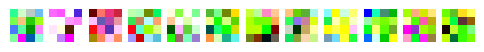

image name ./save_images/res_4x4_0.jpg
elapsed : 11 min 15 sec
STABLE. Resolution 4x4 Step 4000: g_loss 5.2489 d_loss -4.9571
Saving checkpoint ./checkpoints/stylegan/res_4x4_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_4x4_4000/g_2\assets


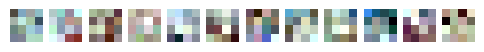

image name ./save_images/res_4x4_4000.jpg
Growing model to 8x8
Resolution 8x8
elapsed : 0 min 0 sec
TRANSITION. Resolution 8x8 Step 0: g_loss 2.7016 d_loss -3.7372
Saving checkpoint ./checkpoints/stylegan/res_8x8_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_3\assets


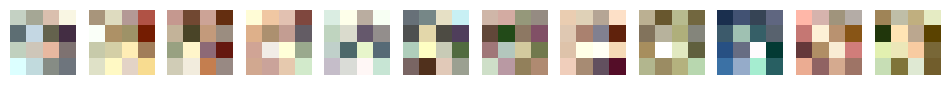

image name ./save_images/res_8x8_0.jpg
elapsed : 17 min 27 sec
TRANSITION. Resolution 8x8 Step 4000: g_loss 6.7599 d_loss -7.1766
Saving checkpoint ./checkpoints/stylegan/res_8x8_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_3\assets


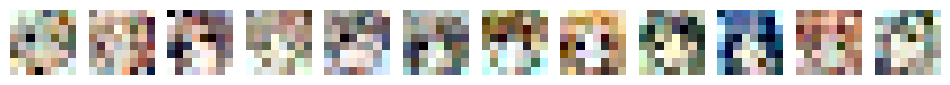

image name ./save_images/res_8x8_4000.jpg
elapsed : 17 min 36 sec
STABLE. Resolution 8x8 Step 0: g_loss 3.9144 d_loss -6.8463
Saving checkpoint ./checkpoints/stylegan/res_8x8_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_0/g_3\assets


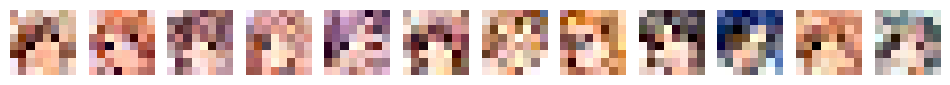

image name ./save_images/res_8x8_0.jpg
elapsed : 17 min 51 sec
STABLE. Resolution 8x8 Step 4000: g_loss 2.0280 d_loss -5.2594
Saving checkpoint ./checkpoints/stylegan/res_8x8_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_8x8_4000/g_3\assets


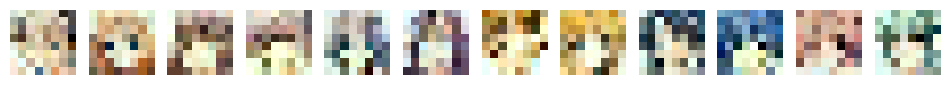

image name ./save_images/res_8x8_4000.jpg
Growing model to 16x16
Resolution 16x16
elapsed : 0 min 0 sec
TRANSITION. Resolution 16x16 Step 0: g_loss 0.6651 d_loss -3.2243
Saving checkpoint ./checkpoints/stylegan/res_16x16_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_4\assets


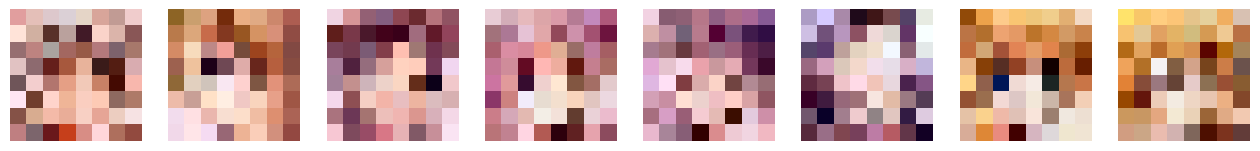

image name ./save_images/res_16x16_0.jpg
elapsed : 40 min 44 sec
TRANSITION. Resolution 16x16 Step 4000: g_loss 0.4637 d_loss -9.8724
Saving checkpoint ./checkpoints/stylegan/res_16x16_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_4\assets


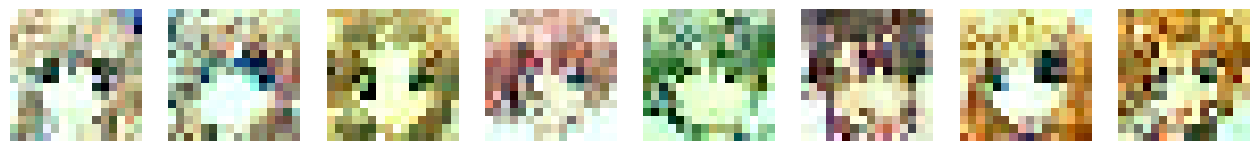

image name ./save_images/res_16x16_4000.jpg
elapsed : 40 min 39 sec
STABLE. Resolution 16x16 Step 0: g_loss 4.4999 d_loss -6.4836
Saving checkpoint ./checkpoints/stylegan/res_16x16_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_0/g_4\assets


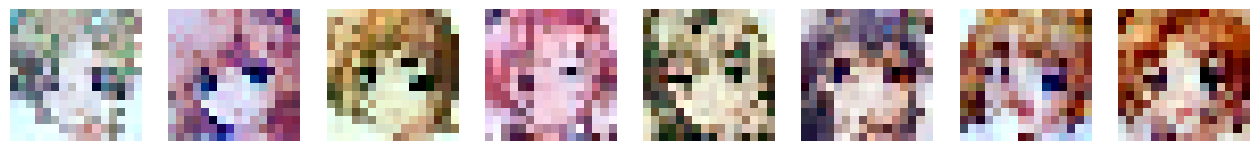

image name ./save_images/res_16x16_0.jpg
elapsed : 40 min 38 sec
STABLE. Resolution 16x16 Step 4000: g_loss 13.8336 d_loss -14.9024
Saving checkpoint ./checkpoints/stylegan/res_16x16_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_16x16_4000/g_4\assets


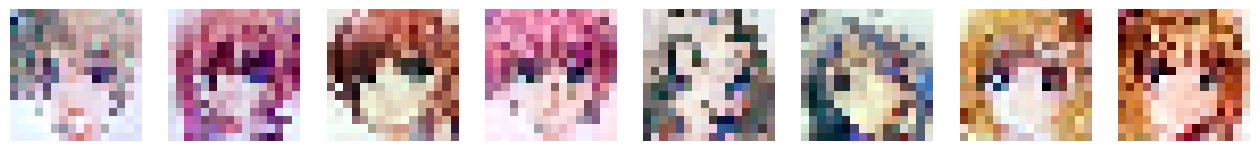

image name ./save_images/res_16x16_4000.jpg
Growing model to 32x32
Resolution 32x32
elapsed : 0 min 0 sec
TRANSITION. Resolution 32x32 Step 0: g_loss 11.3683 d_loss -5.0457
Saving checkpoint ./checkpoints/stylegan/res_32x32_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_5\assets


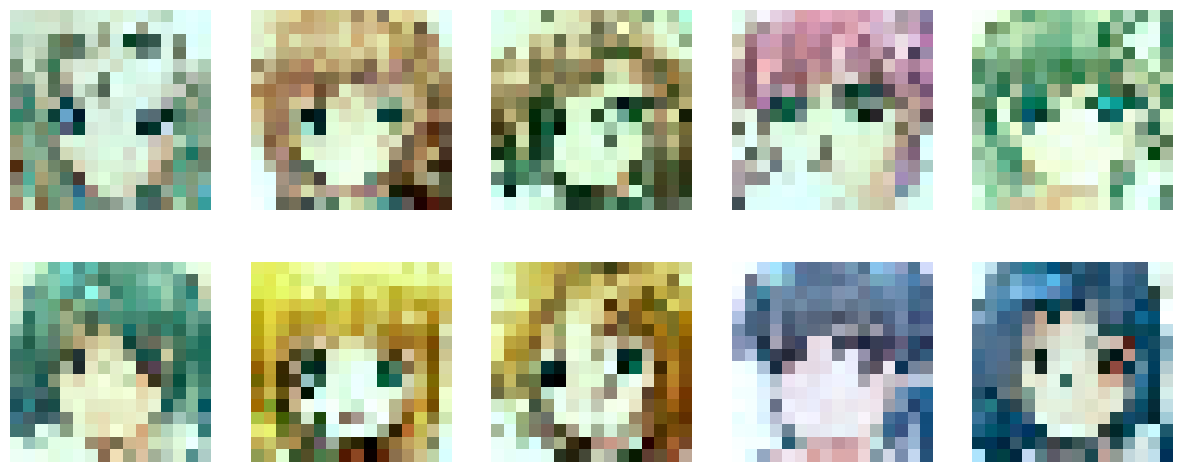

image name ./save_images/res_32x32_0.jpg
elapsed : 95 min 25 sec
TRANSITION. Resolution 32x32 Step 4000: g_loss 3.3549 d_loss -11.2561
Saving checkpoint ./checkpoints/stylegan/res_32x32_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_5\assets


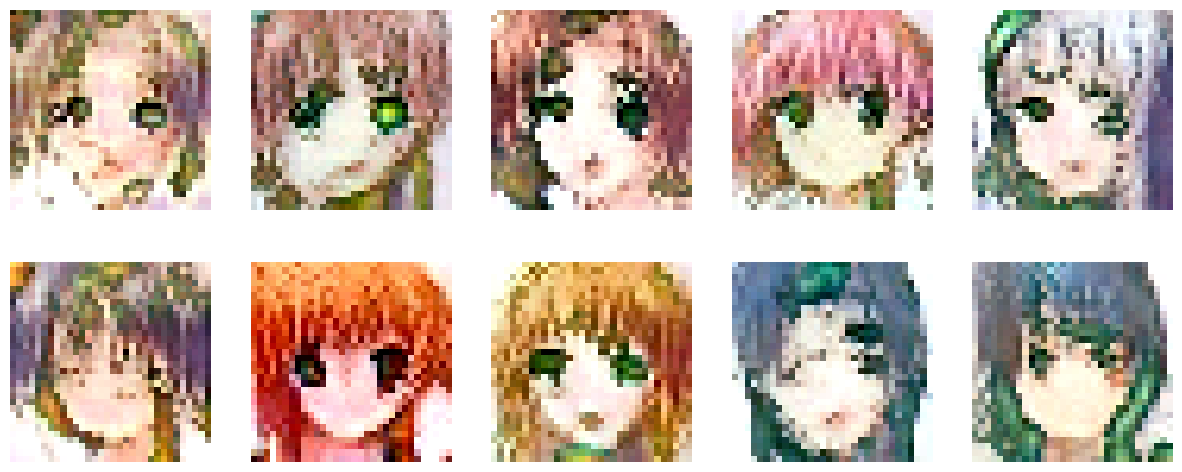

image name ./save_images/res_32x32_4000.jpg
elapsed : 94 min 54 sec
STABLE. Resolution 32x32 Step 0: g_loss 9.1430 d_loss -20.2323
Saving checkpoint ./checkpoints/stylegan/res_32x32_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_0/g_5\assets


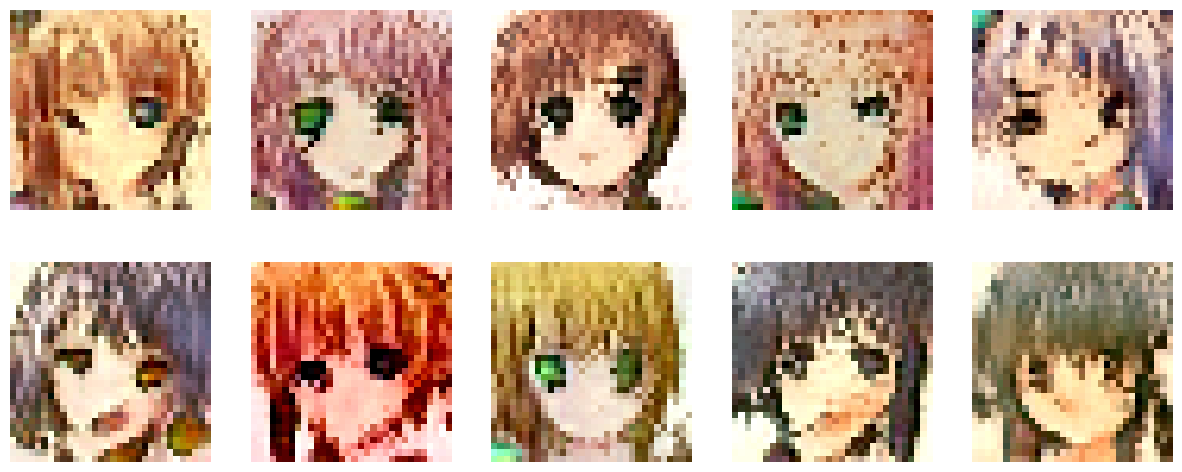

image name ./save_images/res_32x32_0.jpg
elapsed : 99 min 23 sec
STABLE. Resolution 32x32 Step 4000: g_loss 37.8122 d_loss -36.9243
Saving checkpoint ./checkpoints/stylegan/res_32x32_4000


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_32x32_4000/g_5\assets


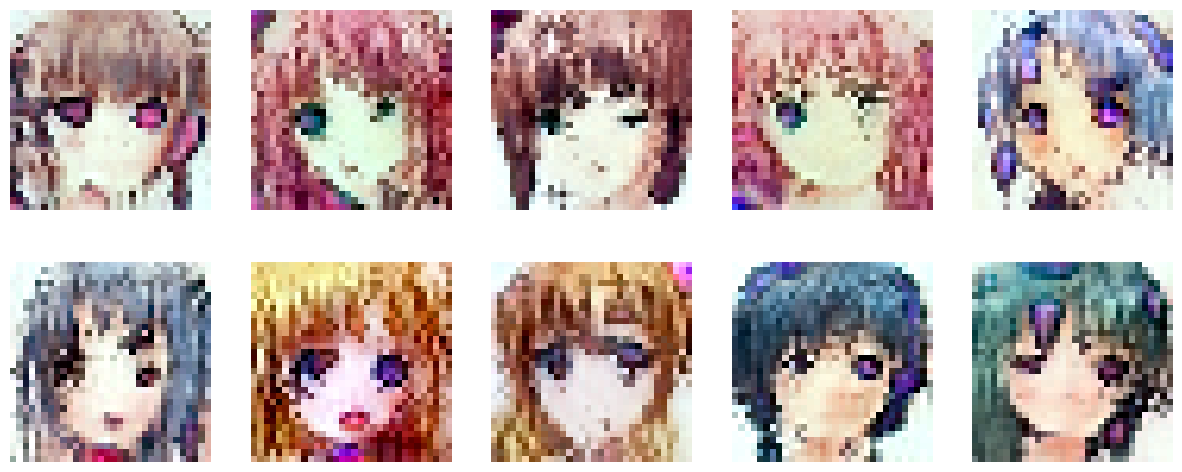

image name ./save_images/res_32x32_4000.jpg
Growing model to 64x64
Resolution 64x64
elapsed : 0 min 0 sec
TRANSITION. Resolution 64x64 Step 0: g_loss 31.8347 d_loss -12.8541
Saving checkpoint ./checkpoints/stylegan/res_64x64_0


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/mapping\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_2\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_3\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_4\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_5\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/to_rgb_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/from_rgb_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/d_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_6\assets


INFO:tensorflow:Assets written to: ./checkpoints/stylegan/res_64x64_0/g_6\assets


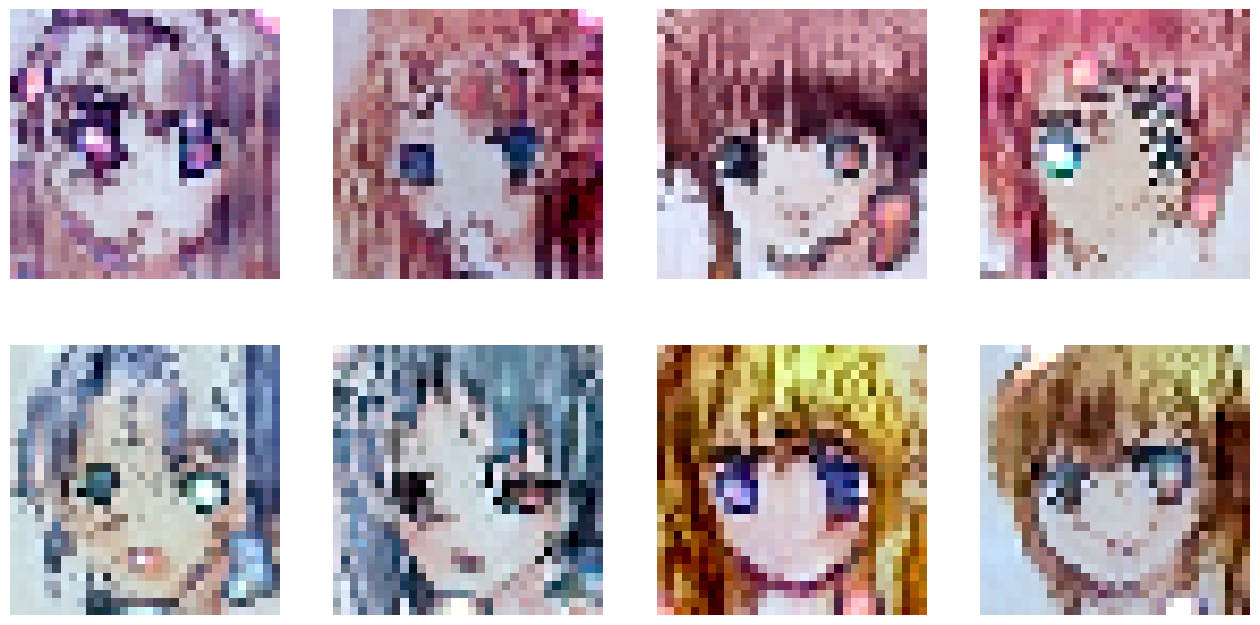

image name ./save_images/res_64x64_0.jpg


ResourceExhaustedError: Exception encountered when calling layer "leaky_re_lu_54" "                 f"(type LeakyReLU).

{{function_node __wrapped__LeakyRelu_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[16,64,64,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:LeakyRelu]

Call arguments received by layer "leaky_re_lu_54" "                 f"(type LeakyReLU):
  • inputs=tf.Tensor(shape=(16, 64, 64, 256), dtype=float32)

In [48]:
stylegan.train(train_datasets, 8000, 4000)